In [82]:
!pip install numpy


In [83]:
!pip install pandas


In [84]:
!pip install matplotlib

In [85]:
!pip install Scikit-learn

In [86]:
!pip install Flask

In [87]:
!pip install joblib

In [ ]:
import numpy as np
import pandas as pd

In [88]:
df=pd.read_csv('measurements.csv')

print(df.head())

df.head()

   distance  consume  speed  temp_inside  temp_outside specials gas_type  AC  \
0      28.0      5.0     26         21.5            12      NaN      E10   0   
1      12.0      4.2     30         21.5            13      NaN      E10   0   
2      11.2      5.5     38         21.5            15      NaN      E10   0   
3      12.9      3.9     36         21.5            14      NaN      E10   0   
4      18.5      4.5     46         21.5            15      NaN      E10   0   

   rain  sun  refill liters refill gas  
0     0    0           45.0        E10  
1     0    0            NaN        NaN  
2     0    0            NaN        NaN  
3     0    0            NaN        NaN  
4     0    0            NaN        NaN  


distance  consume  speed  temp_inside  temp_outside specials gas_type  AC  \
0      28.0      5.0     26         21.5            12      NaN      E10   0   
1      12.0      4.2     30         21.5            13      NaN      E10   0   
2      11.2      5.5     38         21.5            15      NaN      E10   0   
3      12.9      3.9     36         21.5            14      NaN      E10   0   
4      18.5      4.5     46         21.5            15      NaN      E10   0   

   rain  sun  refill liters refill gas  
0     0    0           45.0        E10  
1     0    0            NaN        NaN  
2     0    0            NaN        NaN  
3     0    0            NaN        NaN  
4     0    0            NaN        NaN

In [89]:
import seaborn as sns
sns.heatmap(df.isnull())

<Axes: >

<ipython-input-90-943d61925e52>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


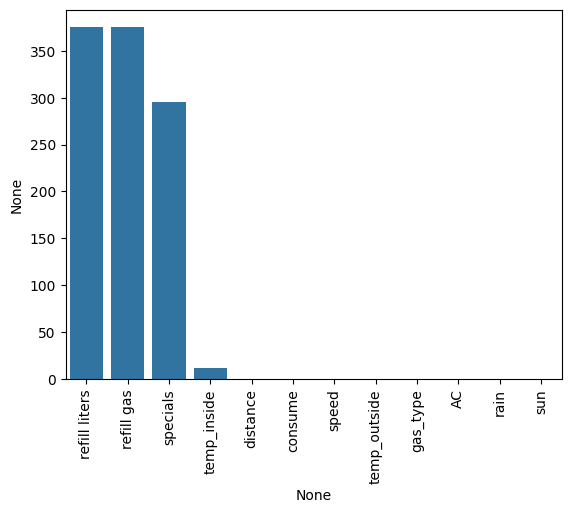

In [90]:
null_values=df.isnull().sum().sort_values(ascending=False)
ax=sns.barplot(x=null_values.index,y=null_values)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
import matplotlib.pyplot as plt
plt.show()

In [91]:
import seaborn as sns
sns.heatmap(df.isnull())

<Axes: >

In [92]:
df.drop(['refill gas','refill liters','specials'],axis=1,inplace=True)
sns.heatmap(df.isnull())

<Axes: >

In [93]:
df['temp_inside']=df['temp_inside'].astype(str).str.replace(',','.')
df['distance']=df['distance'].astype(str).str.replace(',','.')
df['consume']=df['consume'].astype(str).str.replace(',','.')

In [94]:
df.head()

distance consume  speed temp_inside  temp_outside gas_type  AC  rain  sun
0     28.0     5.0     26        21.5            12      E10   0     0    0
1     12.0     4.2     30        21.5            13      E10   0     0    0
2     11.2     5.5     38        21.5            15      E10   0     0    0
3     12.9     3.9     36        21.5            14      E10   0     0    0
4     18.5     4.5     46        21.5            15      E10   0     0    0

In [95]:
df['temp_inside'].value_counts()

temp_inside
21.5    133
22.0    102
22.5     59
20.0     25
21.0     13
23.0     13
nan      12
25.0     12
24.5      7
20.5      4
24.0      3
23.5      2
25.5      2
19.0      1
Name: count, dtype: int64

In [96]:
df.describe()

speed  temp_outside          AC        rain         sun
count  388.000000    388.000000  388.000000  388.000000  388.000000
mean    41.927835     11.358247    0.077320    0.123711    0.082474
std     13.598524      6.991542    0.267443    0.329677    0.275441
min     14.000000     -5.000000    0.000000    0.000000    0.000000
25%     32.750000      7.000000    0.000000    0.000000    0.000000
50%     40.500000     10.000000    0.000000    0.000000    0.000000
75%     50.000000     16.000000    0.000000    0.000000    0.000000
max     90.000000     31.000000    1.000000    1.000000    1.000000

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   distance      388 non-null    object
 1   consume       388 non-null    object
 2   speed         388 non-null    int64 
 3   temp_inside   388 non-null    object
 4   temp_outside  388 non-null    int64 
 5   gas_type      388 non-null    object
 6   AC            388 non-null    int64 
 7   rain          388 non-null    int64 
 8   sun           388 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 27.4+ KB


In [98]:
df['temp_inside']=df['temp_inside'].astype(float)


In [99]:
temp_inside_mean=np.mean(df['temp_inside'])


In [100]:
print(temp_inside_mean)

21.929521276595743


In [101]:
df['temp_inside'].fillna(temp_inside_mean,inplace=True)

In [131]:
sns.heatmap(df.isnull())

<Axes: >

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
l=LinearRegression()

In [104]:
x=df.drop(['consume','gas_type'],axis=1)
y=df['consume']

In [105]:
x.columns

Index(['distance', 'speed', 'temp_inside', 'temp_outside', 'AC', 'rain',
       'sun'],
      dtype='object')

In [107]:
x=x.values
y=y.values

In [108]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [106]:
l.fit(x_train,y_train)

LinearRegression()

In [110]:
l.fit(x_test,y_test)

LinearRegression()

In [112]:
x_train.shape

(271, 7)

In [113]:
y_pred=l.predict(x_test)

In [114]:
print(l.coef_,l.intercept_)

[-0.00101474 -0.01071861  0.04504304 -0.05937327  0.78216334  0.11593437
 -0.60445131] 4.922197512561345


In [115]:
from sklearn import metrics
print(metrics.mean_squared_error(y_test,y_pred))
print(metrics.mean_absolute_error(y_test,y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

0.6265978757750217
0.5528134092265823
0.791579355323913


In [116]:
dum1 = pd.get_dummies(df['gas_type'])
print(dum1)

       E10   SP98
0     True  False
1     True  False
2     True  False
3     True  False
4     True  False
..     ...    ...
383  False   True
384  False   True
385  False   True
386  False   True
387  False   True

[388 rows x 2 columns]


In [117]:
df=pd.concat([df,dum1],axis=1)


In [118]:
df.drop(['gas_type'],axis=1,inplace=True)

In [119]:
x1=df.drop(['consume'],axis=1)

In [120]:
y1=df['consume']

In [121]:
x1.columns

Index(['distance', 'speed', 'temp_inside', 'temp_outside', 'AC', 'rain', 'sun',
       'E10', 'SP98'],
      dtype='object')

In [122]:
x1=x1.values
y1=y1.values

In [123]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
l=LinearRegression()
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.3,random_state=42)

In [124]:
l.fit(x_train,y_train)

LinearRegression()

In [125]:
l.fit(x_test,y_test)

LinearRegression()

In [126]:
y_pred_1=l.predict(x_test)
print(y_pred_1)

[4.49716812 5.11760522 5.0931576  5.12592227 4.45154635 6.26391465
 5.76109083 5.01318521 5.54597098 4.65937719 4.34147795 4.62689257
 5.90757539 4.74932025 4.79920771 4.94822705 5.31895496 4.97438863
 4.89001321 4.87104718 4.56622106 4.9138717  4.95561215 5.00835583
 4.60830791 4.79516751 3.6540811  3.96878432 5.10438358 4.44158148
 4.94155253 5.02262979 4.46290571 4.56140081 4.79374958 5.1846115
 4.73271995 4.52405694 4.76848927 5.31736047 4.48460973 5.40703015
 5.05825624 5.36359412 4.84084935 4.09222678 4.86660123 4.80582605
 4.29072951 5.38725416 4.57056727 5.20578946 5.41649726 4.9740766
 4.69980861 4.97174084 5.9497319  5.20943874 4.67838654 4.53412443
 5.30888277 4.02771982 4.47131488 3.92487264 4.44278955 4.75253736
 5.4260095  4.00100404 4.97133307 4.69631624 4.57569189 4.8621851
 5.04331717 4.66043704 4.97132928 4.84275416 5.23276443 5.09499174
 5.24879918 5.37620109 5.16433188 5.50360553 4.39450697 5.2267409
 5.59485863 4.73992841 4.86046188 5.65484074 5.01181355 4.52397212

In [127]:
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred_1)))

0.791579355323913


In [128]:
x_train.shape

(271, 7)

In [129]:
x_train[0]

array(['12.3', 62, 21.5, 6, 0, 0, 0], dtype=object)

In [130]:
import pickle
pickle.dump(l,open('fuel.pkl','wb'))